## Import Package

In [ ]:
import cv2
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt

from google.colab import files
image = files.upload()

Saving foto-bola-dan-piala.jpg to foto-bola-dan-piala.jpg


## Segmentasi Foto dengan ruang warna HSV

In [ ]:
img = cv2.imread('foto-bola-dan-piala.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

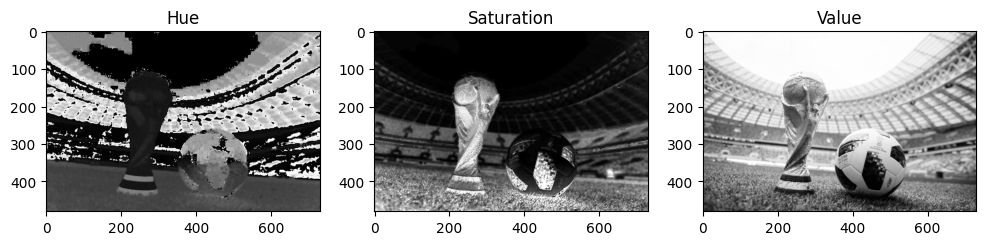

In [ ]:
img_hsv = rgb2hsv(img_rgb)

fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(img_hsv[:,:,0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(img_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(img_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value');

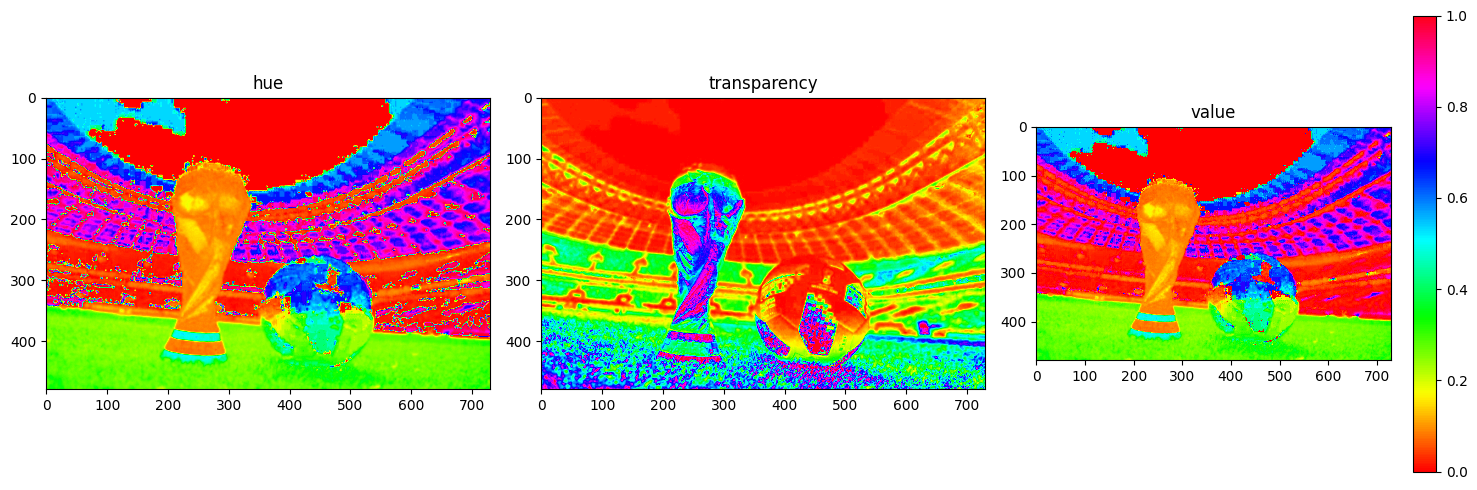

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img_hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(img_hsv[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(img_hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(img_hsv[:,:,0],cmap='hsv'))
fig.tight_layout()

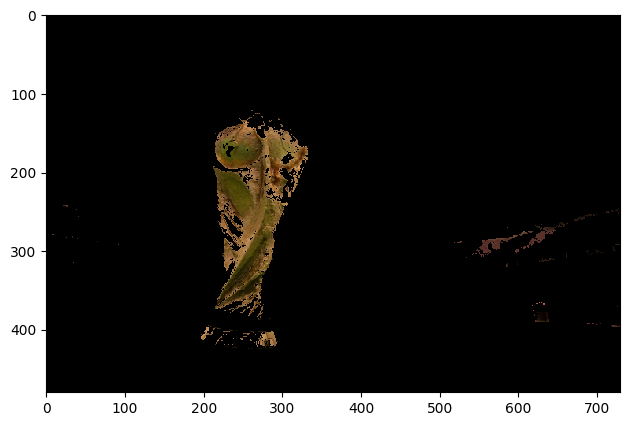

In [ ]:
#refer to hue channel (in the colorbar)
lower_mask = img_hsv[:,:,0] > 0.01
#refer to hue channel (in the colorbar)
upper_mask = img_hsv[:,:,0] < 0.17
#refer to transparency channel (in the colorbar)
saturation_mask = img_hsv[:,:,1] > 0.5

mask = upper_mask * lower_mask * saturation_mask
red = img_rgb[:,:,0] * mask
green = img_rgb[:,:,1] * mask
blue = img_rgb[:,:,2] * mask
img_masked = np.dstack((red, green, blue))
imshow(img_masked)